In [1]:
!pip install astroquery

     ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
      --------------------------------------- 0.1/4.5 MB 3.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.5/4.5 MB 6.7 MB/s eta 0:00:01
     ------- -------------------------------- 0.9/4.5 MB 7.1 MB/s eta 0:00:01
     ------------ --------------------------- 1.4/4.5 MB 8.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.8/4.5 MB 8.3 MB/s eta 0:00:01
     --------------------- ------------------ 2.5/4.5 MB 9.3 MB/s eta 0:00:01
     ---------------------------- ----------- 3.2/4.5 MB 10.2 MB/s eta 0:00:01
     --------------------------------- ------ 3.8/4.5 MB 10.9 MB/s eta 0:00:01
     ------------------------------------- -- 4.3/4.5 MB 11.0 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 10.7 MB/s eta 0:00:01
     ---------------------------------------- 4.5/4.5 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -

In [2]:
import matplotlib.pyplot as plt

In [3]:
from astroquery.skyview import SkyView

In [4]:
SkyView.get_images("M31" , "SDSSg")

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001C37A5BECD0>]]

In [5]:
 SkyView.get_images("M31" , "SDSSg")[0]

In [6]:
 SkyView.get_images("M31" , "SDSSg")[0][0]

In [7]:
hdu =  SkyView.get_images("M31" , "SDSSg")[0][0]

In [8]:
hdu.header

SIMPLE  =                    T / Written by SkyView Thu Feb 01 01:40:52 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [9]:
hdu.data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [10]:
M31_header = hdu.header

In [11]:
M31_header

SIMPLE  =                    T / Written by SkyView Thu Feb 01 01:40:52 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [12]:
M31_Pixels = hdu.data

In [13]:
type(M31_Pixels)

numpy.ndarray

In [14]:
M31_Pixels.shape

(300, 300)

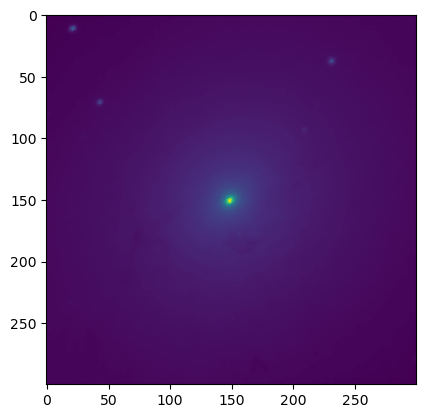

In [15]:
plt.imshow(M31_Pixels)

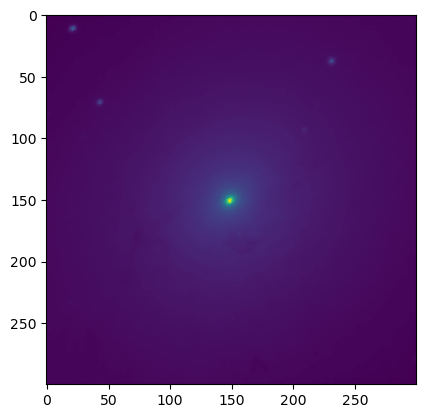

In [16]:
plt.imshow(M31_Pixels , cmap='viridis')

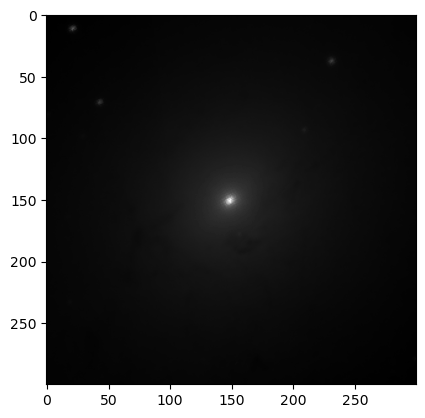

In [17]:
plt.imshow(M31_Pixels , cmap='gray')

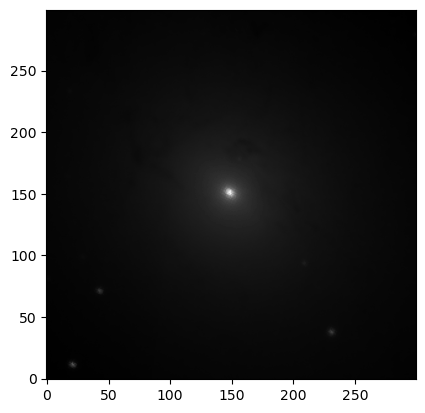

In [18]:
plt.imshow(M31_Pixels , cmap='gray' , origin='lower' )

In [19]:
import astropy.units as u

In [20]:
hdu = SkyView.get_images("M31" , "DSS2 Blue" ,
                        pixels=600,
                        radius=150*u.arcmin)[0][0]

In [21]:
M31_DSS2_Blue_Pixels = hdu.data

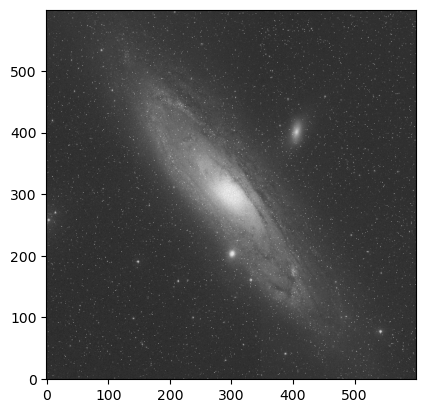

In [22]:
plt.imshow(M31_DSS2_Blue_Pixels , cmap='gray' , origin='lower' )

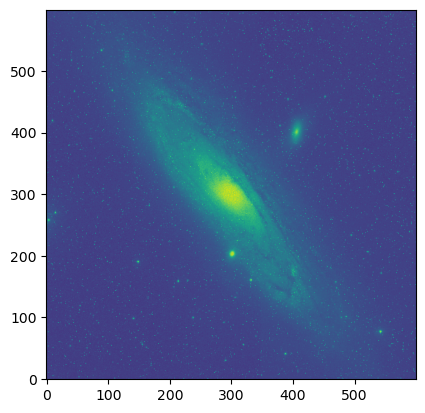

In [23]:
plt.imshow(M31_DSS2_Blue_Pixels , origin='lower' )

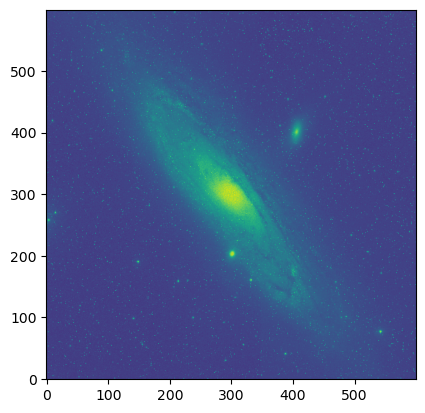

In [24]:
plt.imshow(M31_DSS2_Blue_Pixels , origin='lower' )

## Creating a Custom fits file

In [25]:
from astropy.io import fits

In [26]:
hdulist = fits.HDUList()

In [27]:
hdu1 = fits.PrimaryHDU()

In [28]:
hdu1.data = M31_Pixels

In [29]:
hdu1.header = M31_header

In [30]:
hdulist.append(hdu1)

In [31]:
hdulist.writeto('Dummy_FITS_file.fits' , overwrite=True )

## Opening a fits file locally

In [32]:
My_fits = fits.open('Dummy_FITS_file.fits')

In [33]:
My_fits

In [34]:
My_fits[0]

In [35]:
My_fits[0].header

SIMPLE  =                    T / Written by SkyView Thu Feb 01 01:40:52 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [36]:
My_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [37]:
dummy_data_var = My_fits[0].data

In [38]:
type(dummy_data_var)

numpy.ndarray

In [39]:
dummy_data_var.shape

(300, 300)

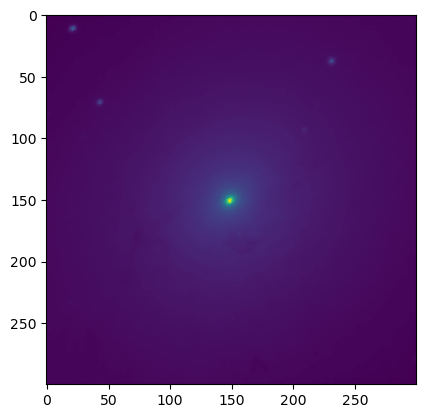

In [40]:
plt.imshow(dummy_data_var )

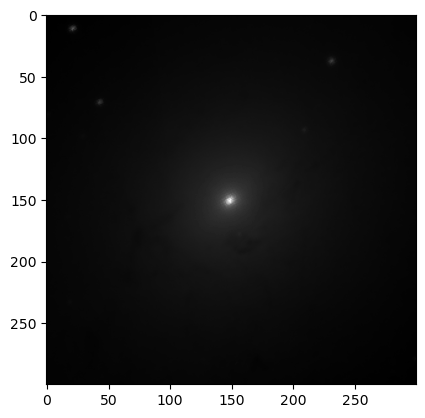

In [41]:
plt.imshow(dummy_data_var , cmap='gray')

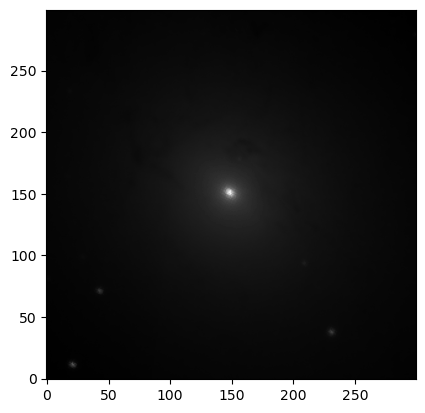

In [42]:
plt.imshow(dummy_data_var , cmap='gray' , origin='lower')

In [43]:
import numpy as np

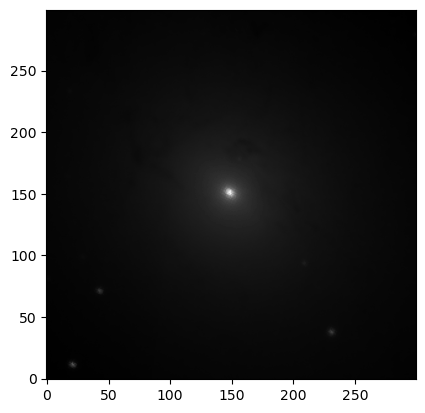

In [44]:
plt.imshow(M31_Pixels , cmap='gray' , origin='lower')

In [45]:
M31_Pixels[150][150]

148.5

In [46]:
M31_Pixels[151][151]

126.5

In [47]:
print(f'Minimum = {np.min(M31_Pixels)}')
print(f'Maximum = {np.max(M31_Pixels)}')
print(f'Average = {np.mean(M31_Pixels)}')
print(f'Std = {np.std(M31_Pixels)}')

Minimum = 5.359375
Maximum = 178.0
Average = 13.329444885253906
Std = 6.3922271728515625


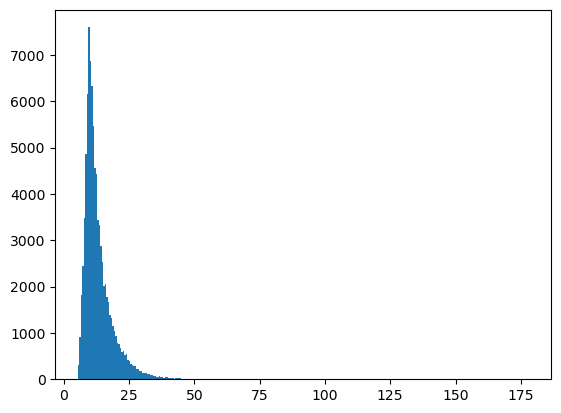

In [49]:
plt.hist(M31_Pixels.flat , bins=300)
plt.show()

## Pixel Scaling

##  1) Intensity Normalization Or Linear Scaling Or Min Max Scaling

In [51]:
M31_Pixels

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [56]:
M31_Pixels.shape

(300, 300)

In [70]:
def plot_pixels(pixel_array , title , color):
    plt.imshow(pixel_array , cmap='gray' , origin='lower')
    plt.title(title , color=color , weight='bold')
    plt.axis('off')

In [74]:
def compare_pixels(scaled_array , title):
    plt.subplot(1,2,1)
    plot_pixels(M31_Pixels , title="Original Image" , color="black")
    plt.subplot(1,2,2)
    plot_pixels(scaled_array , title=title , color="royalblue")
    plt.tight_layout()
    plt.show()

In [75]:
def minmax_scaling(pixel_array):
    num = pixel_array - np.min(pixel_array)
    den = np.max(pixel_array) - np.min(pixel_array)
    return num/den

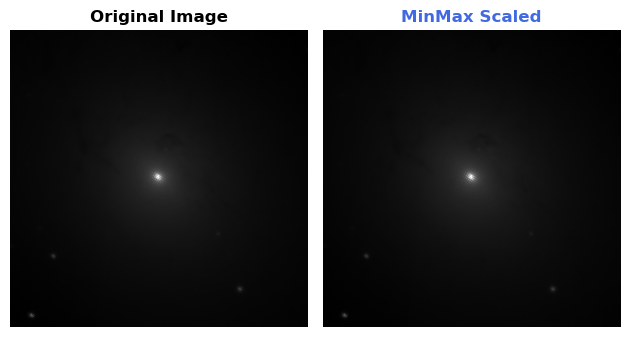

In [76]:
minmax_array = minmax_scaling(M31_Pixels)
compare_pixels(minmax_array , title='MinMax Scaled')

## 2) Standardization Or Z scaling

In [85]:
def zscale(pixel_array):
    num = pixel_array - np.mean(pixel_array)
    den = np.std(pixel_array)
    return num/den

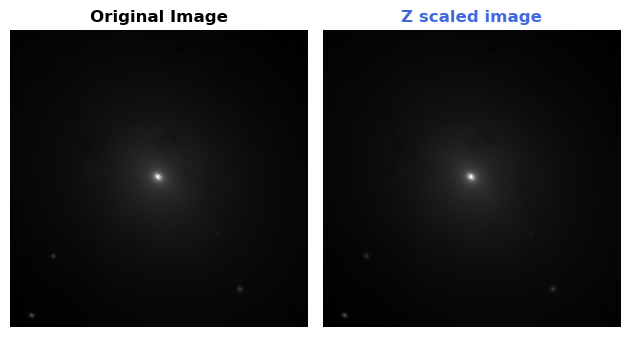

In [86]:
zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array , title='Z scaled image')

## 3)Log Normalization

In [87]:
def log_normalization(pixel_array):
    return np.log(pixel_array)

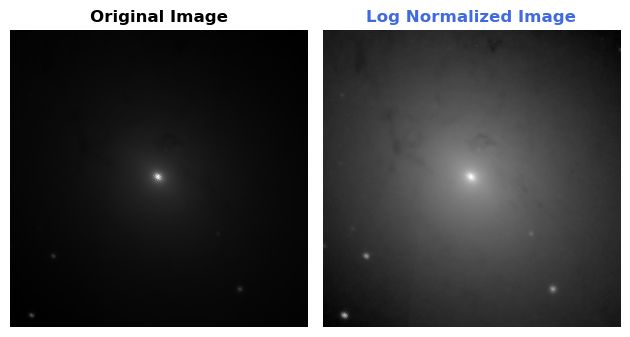

In [88]:
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array , title='Log Normalized Image')

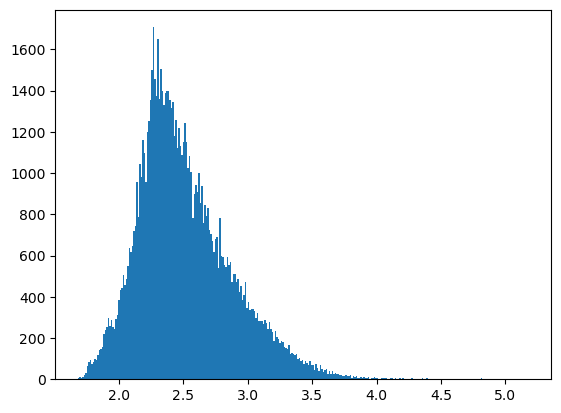

In [89]:
plt.hist(log_norm_array.flat , bins=300)
plt.show()

In [90]:
log_norm_array.shape

(300, 300)

In [91]:
def sqrt_scaling(pixel_array):
    return np.sqrt(pixel_array)

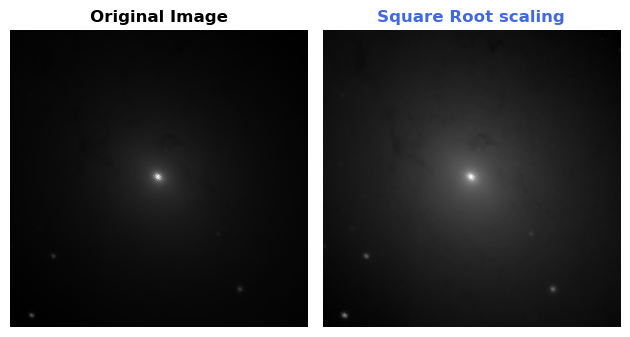

In [92]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array , title="Square Root scaling")

In [93]:
from astropy.visualization import ZScaleInterval

In [94]:
z = ZScaleInterval()

In [95]:
z1 , z2 = z.get_limits(log_norm_array)

In [96]:
print(z1 , z2)

1.6889998 4.447910199027211


In [97]:
print(np.min(log_norm_array) , np.max(log_norm_array))

1.6788473 5.1817837


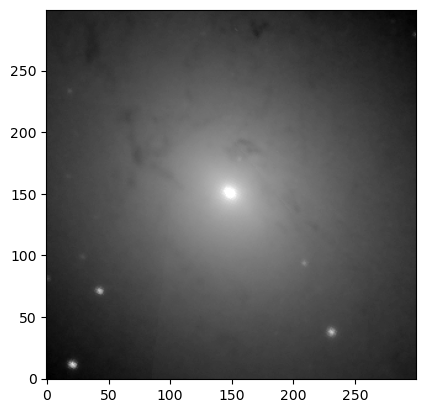

In [98]:
img = plt.imshow(log_norm_array , vmin=z1 , vmax=z2 , cmap='gray' , origin='lower')
plt.show()

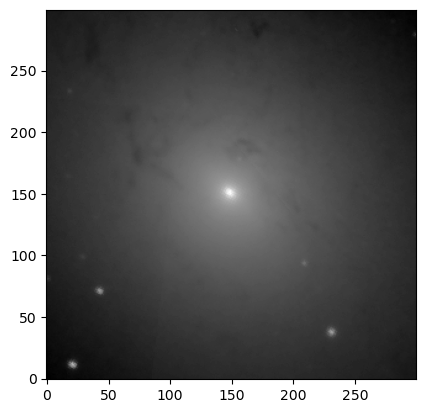

In [99]:
img = plt.imshow(log_norm_array , cmap='gray' , origin='lower')
plt.show()

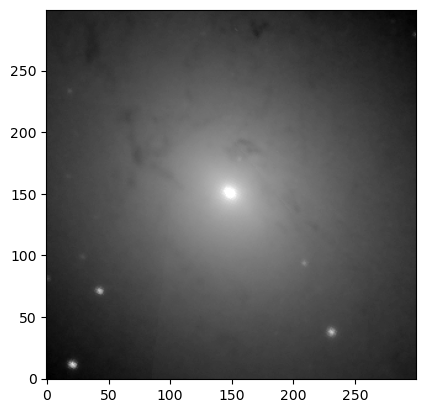

In [100]:
img = plt.imshow(log_norm_array , vmin=z1 , vmax=z2 , cmap='gray' , origin='lower')
plt.show()

In [101]:
img

In [102]:
image_array = img.make_image(renderer=None , unsampled=True)[0]

In [103]:
image_array.shape

(300, 300, 4)

In [104]:
image_array

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 29,  29,  29, 255],
        [ 30,  30,  30, 255],
        [ 29,  29,  29, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 29,  29,  29, 255],
        [ 29,  29,  29, 255]],

       [[  1,   1,   1, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 29,  29,  29, 255],
        [ 31,  31,  31, 255],
        [ 29,  29,  29, 255]],

       ...,

       [[ 28,  28,  28, 255],
        [ 28,  28,  28, 255],
        [ 30,  30,  30, 255],
        ...,
        [  1,   1,   1, 255],
        [  4,   4,   4, 255],
        [  5,   5,   5, 255]],

       [[ 29,  29,  29, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  2,   2,   2, 255]],

       [[ 30

In [106]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.6 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.7/38.6 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.1/38.6 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.6 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.0/38.6 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.8/38.6 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.3/38.6 MB 8.0 MB/s eta 0:00:05
   ---- --------

In [107]:
import cv2

In [108]:
gray_array = cv2.cvtColor(image_array , cv2.COLOR_BGRA2GRAY)

In [109]:
gray_array

array([[ 0,  0,  0, ..., 29, 30, 29],
       [ 0,  0,  0, ..., 31, 29, 29],
       [ 1,  0,  0, ..., 29, 31, 29],
       ...,
       [28, 28, 30, ...,  1,  4,  5],
       [29, 31, 31, ...,  4,  4,  2],
       [30, 30, 31, ...,  1,  3,  2]], dtype=uint8)

In [110]:
gray_array.shape

(300, 300)

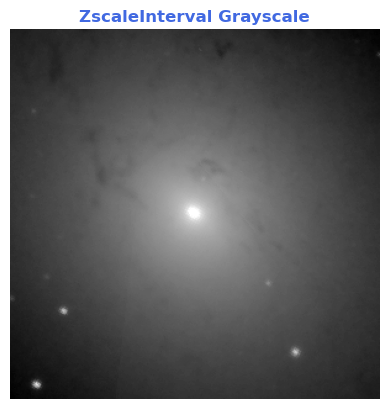

In [116]:
plot_pixels(gray_array , title='ZscaleInterval Grayscale' , color='royalblue')

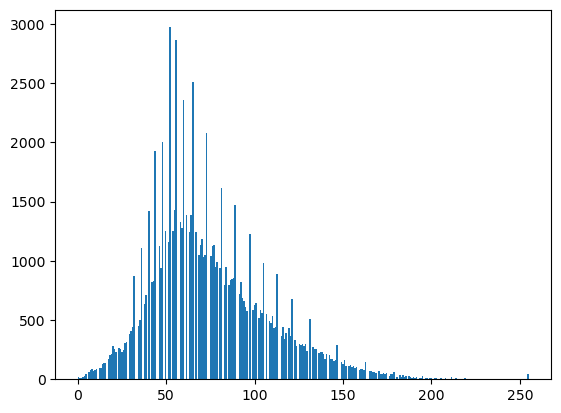

In [117]:
plt.hist(gray_array.flat , bins=300)
plt.show()

In [118]:
grayscale_zint_array = gray_array

In [119]:
grayscale_zint_array

array([[ 0,  0,  0, ..., 29, 30, 29],
       [ 0,  0,  0, ..., 31, 29, 29],
       [ 1,  0,  0, ..., 29, 31, 29],
       ...,
       [28, 28, 30, ...,  1,  4,  5],
       [29, 31, 31, ...,  4,  4,  2],
       [30, 30, 31, ...,  1,  3,  2]], dtype=uint8)

In [120]:
grayscale_zint_array.shape

(300, 300)